In [1]:
#Maoyi Song
#Final project
import pandas as pd
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
import sklearn
import seaborn as sns

data1=pd.read_csv('~/Downloads/all/aisles.csv')

In [2]:
data2=pd.read_csv('~/Downloads/all/order_products__prior.csv')

In [3]:
data3=pd.read_csv('~/Downloads/all/order_products__train.csv')

In [4]:
data4=pd.read_csv('~/Downloads/all/departments.csv')

In [5]:
data5=pd.read_csv('~/Downloads/all/orders.csv')

In [6]:
data6=pd.read_csv('~/Downloads/all/products.csv')

In [7]:
data1.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
data2.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
data3.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
data4.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
data5.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
data6.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
data2_prior = pd.merge( data2, data6, on='product_id', how='left')
data2_prior = pd.merge( data2_prior, data1 , on='aisle_id', how='left')
data2_prior = pd.merge( data2_prior, data4 , on='department_id', how='left')
data2_prior = pd.merge( data2_prior, data5 , on='order_id', how='left')
data2_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [20]:
data2_prior_nullsum=data2_prior.isnull().sum()
data2_prior_nullsum

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

In [21]:
data_prior=data2_prior.fillna("0")

In [22]:
data_prior_nullsum=data_prior.isnull().sum()
data_prior_nullsum

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [228]:
cnt_srs = data_prior['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


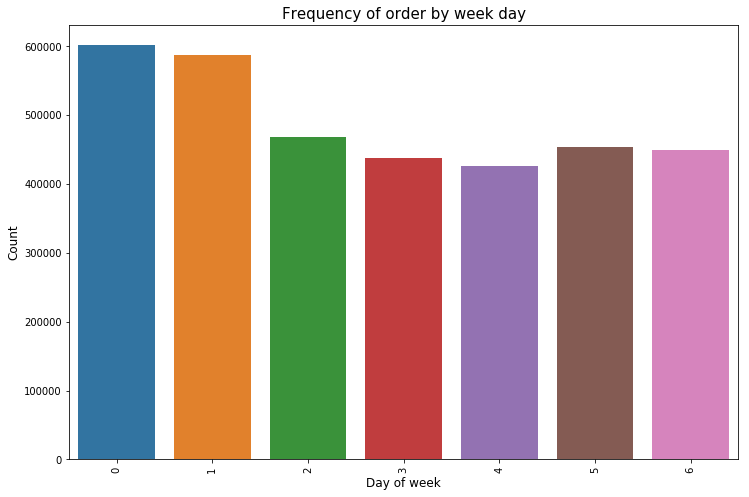

In [204]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=data5)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

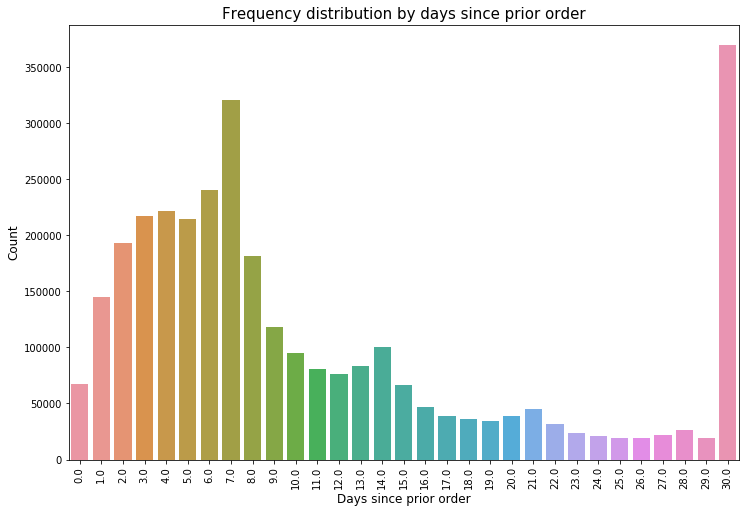

In [208]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=data5)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

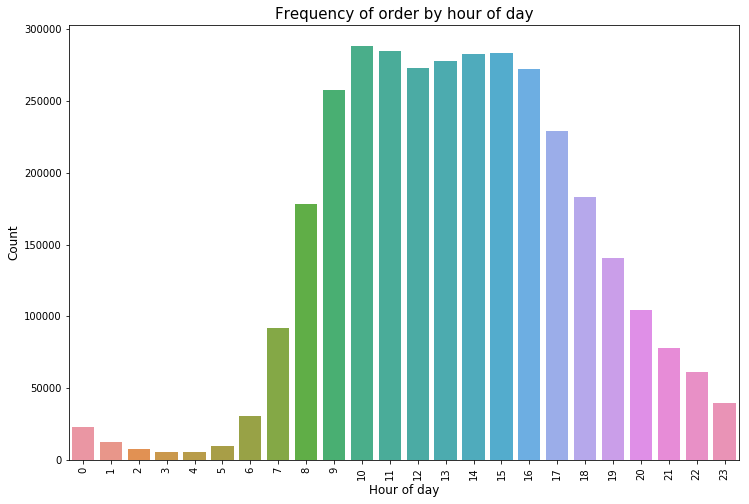

In [206]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=data5)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

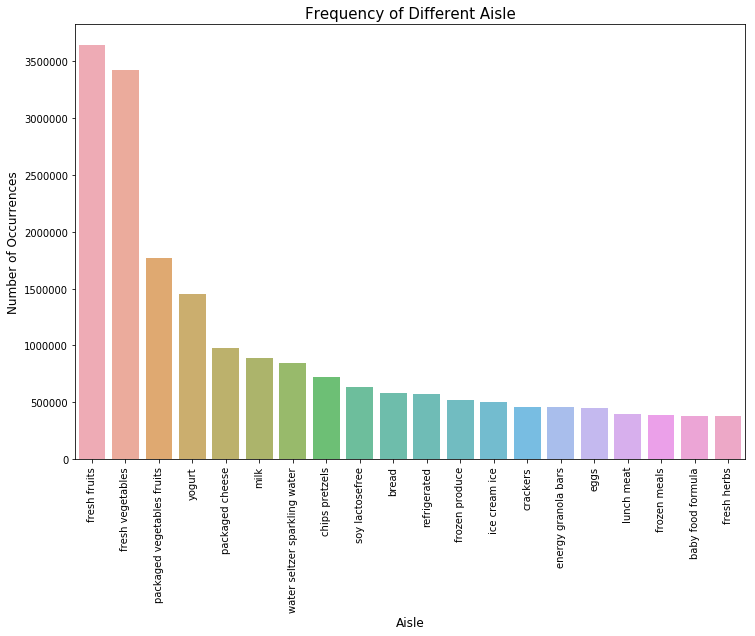

In [224]:
cnt_srs = data_prior['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.title("Frequency of Different Aisle", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

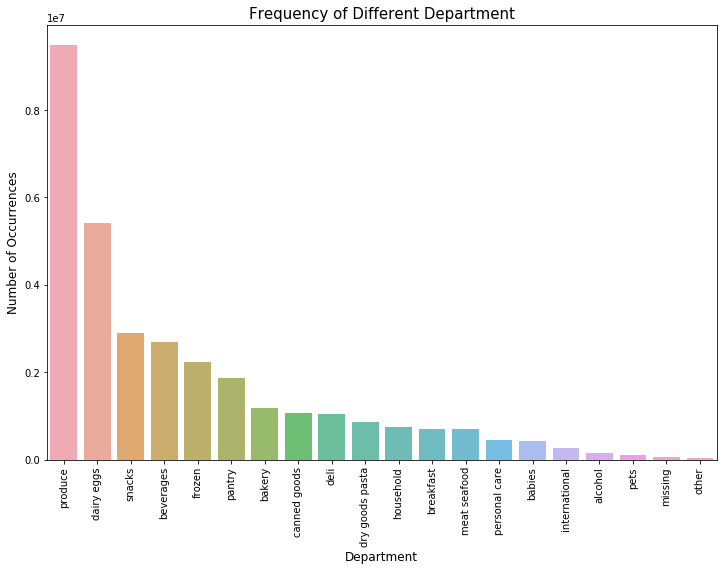

In [232]:
cnt_srs = data_prior['department'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Frequency of Different Department", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

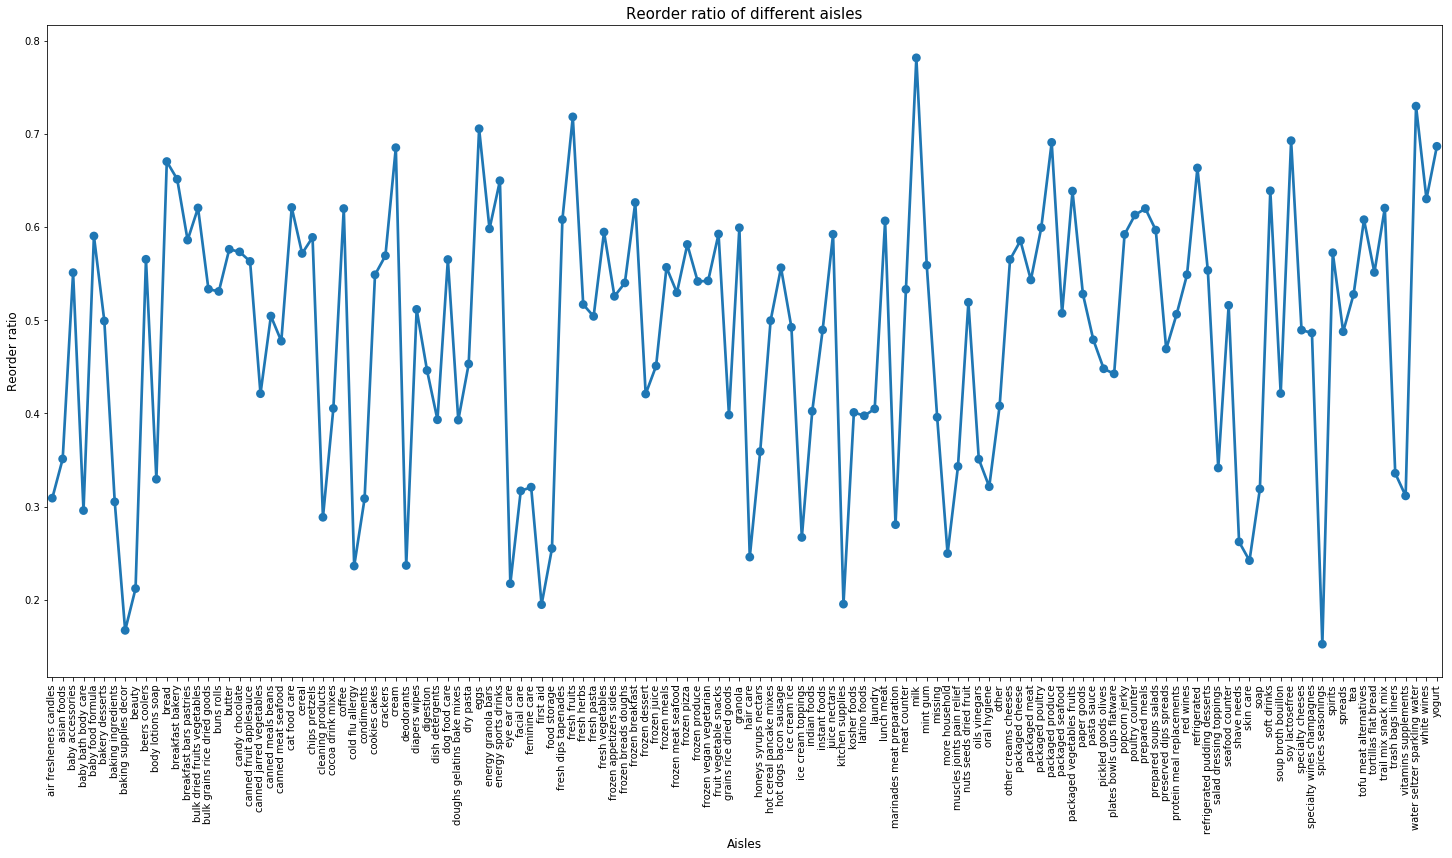

In [229]:
grouped_df = data_prior.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(25,12))
sns.pointplot(grouped_df['aisle'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Aisles', fontsize=12)
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

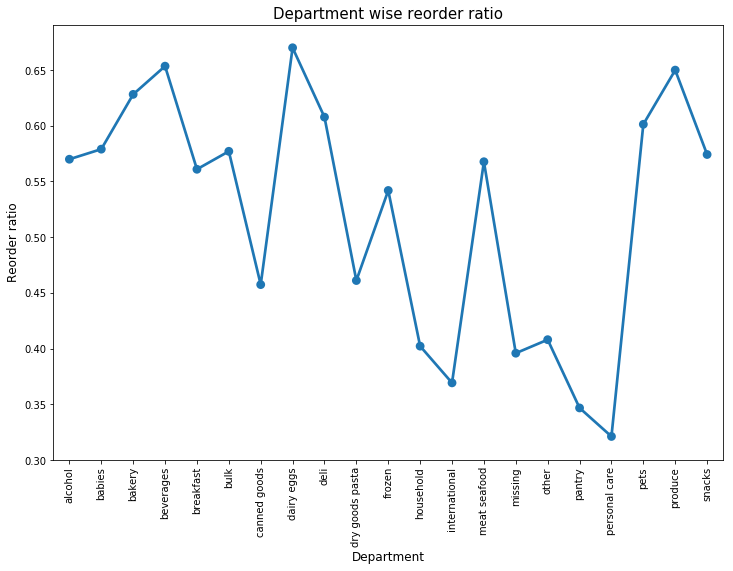

In [217]:
grouped_df = data_prior.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


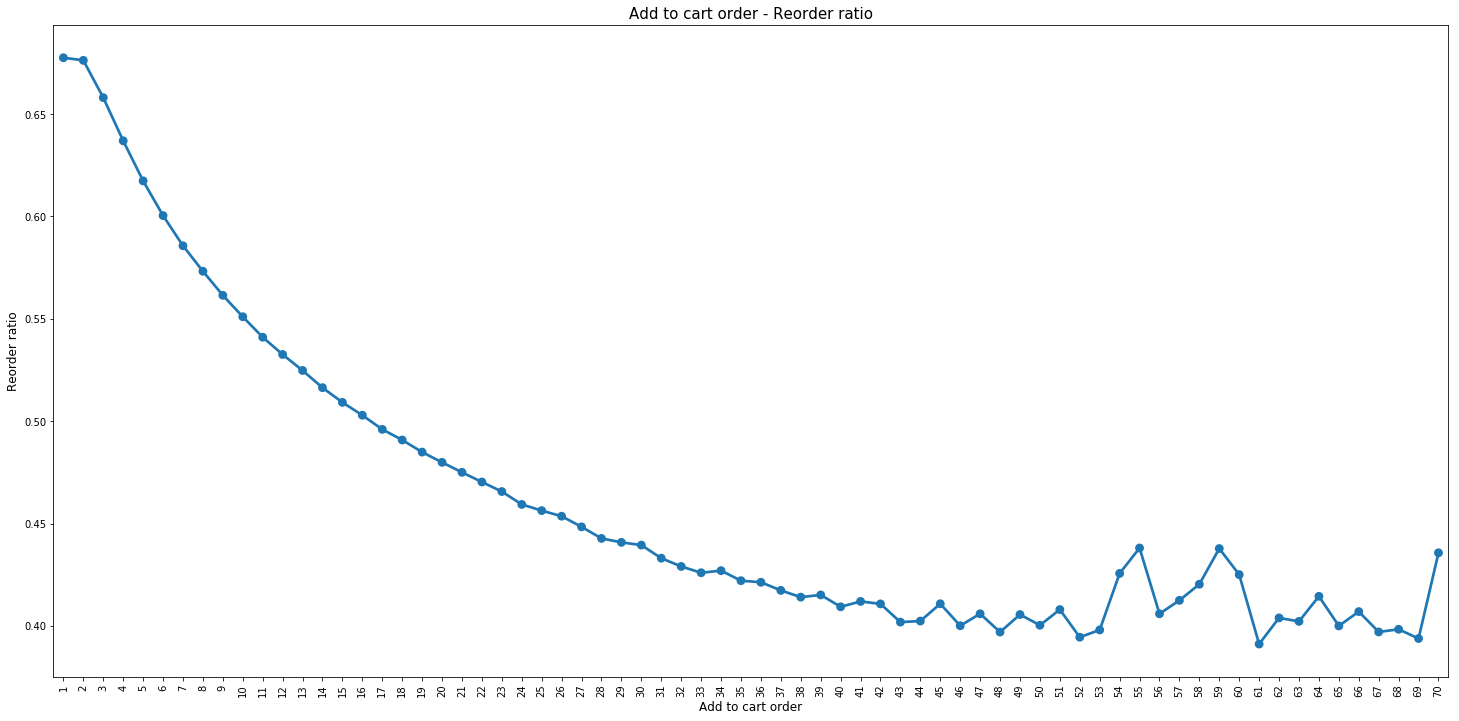

In [222]:
data_prior["add_to_cart_order_mod"] = data_prior["add_to_cart_order"].copy()
data_prior["add_to_cart_order_mod"].ix[data_prior["add_to_cart_order_mod"]>70] = 70
grouped_df = data_prior.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(25,12))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

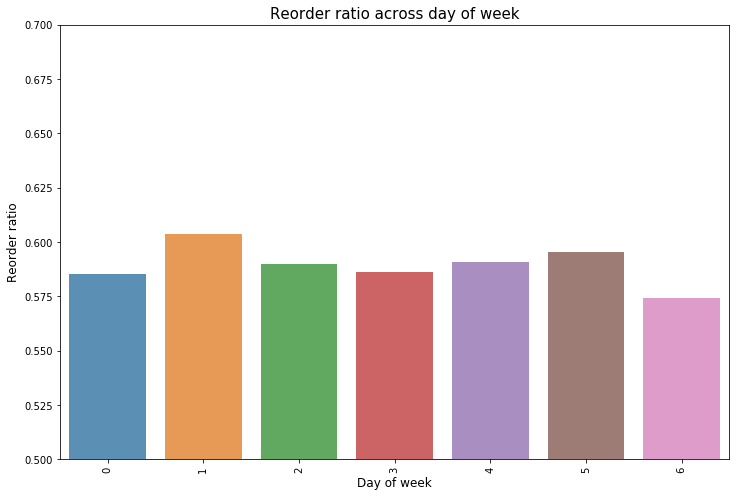

In [226]:
grouped_df = data_prior.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

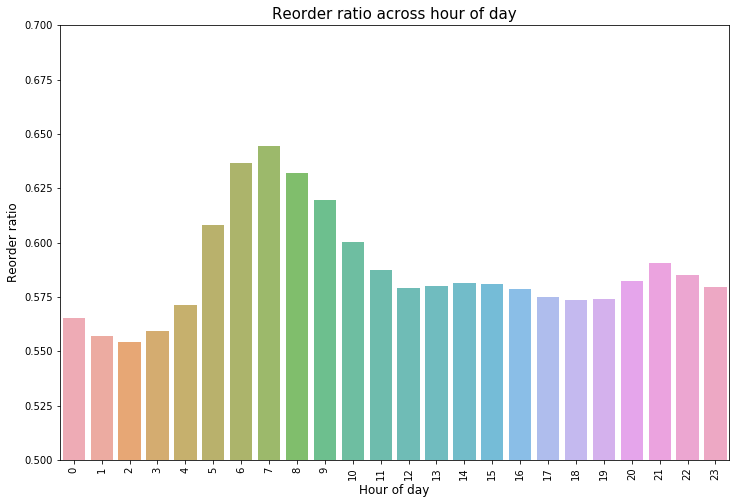

In [227]:
grouped_df = data_prior.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

In [17]:
data3_train = pd.merge( data3, data6, on='product_id', how='left')
data3_train = pd.merge( data3_train, data1 , on='aisle_id', how='left')
data3_train = pd.merge( data3_train, data4 , on='department_id', how='left')
data3_train = pd.merge( data3_train, data5 , on='order_id', how='left')
data3_train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0


In [18]:
data3_train_nullsum=data3_train.isnull().sum()
data3_train_nullsum

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [92]:
data_prior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
product_name              object
aisle_id                  int64
department_id             int64
aisle                     object
department                object
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    object
dtypes: int64(10), object(5)
memory usage: 3.9+ GB


In [93]:
data_prior.shape

(32434489, 15)

In [109]:
from sklearn.utils import resample
subsetdata=resample(data_prior,n_samples=5000)
subsetdata.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3846192,406039,24954,1,1,Total 0% with Honey Nonfat Greek Strained Yogurt,120,16,yogurt,dairy eggs,92293,prior,15,6,9,9
16009955,1689173,49521,7,1,Lentil Filled Bolani 2 Pack,13,20,prepared meals,deli,80049,prior,23,6,9,6
21090475,2224589,16283,9,1,Fresh Asparagus,83,4,fresh vegetables,produce,17477,prior,6,4,10,8
28697339,3026497,5883,1,1,Organic Strawberry Lemonade,98,7,juice nectars,beverages,105094,prior,13,4,21,6
28043420,2957217,18523,21,1,Total 2% All Natural Greek Strained Yogurt wit...,120,16,yogurt,dairy eggs,203972,prior,22,5,16,4


In [24]:
subsetdata_nullsum=subsetdata.isnull().sum()
subsetdata_nullsum

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [133]:
df = subsetdata.drop(columns=['product_name','aisle','department','eval_set'], axis=1)
df.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
3846192,406039,24954,1,1,120,16,92293,15,6,9,9
16009955,1689173,49521,7,1,13,20,80049,23,6,9,6
21090475,2224589,16283,9,1,83,4,17477,6,4,10,8
28697339,3026497,5883,1,1,98,7,105094,13,4,21,6
28043420,2957217,18523,21,1,120,16,203972,22,5,16,4


In [173]:
df = df.reindex_axis(['order_id','product_id','add_to_cart_order','aisle_id','department_id','user_id','order_number','order_dow','order_hour_of_day','days_since_prior_order','reordered'], axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


In [174]:
df.head()

,order_id,product_id,add_to_cart_order,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
3846192,406039,24954,1,120,16,92293,15,6,9,9,1
16009955,1689173,49521,7,13,20,80049,23,6,9,6,1
21090475,2224589,16283,9,83,4,17477,6,4,10,8,1
28697339,3026497,5883,1,98,7,105094,13,4,21,6,1
28043420,2957217,18523,21,120,16,203972,22,5,16,4,1


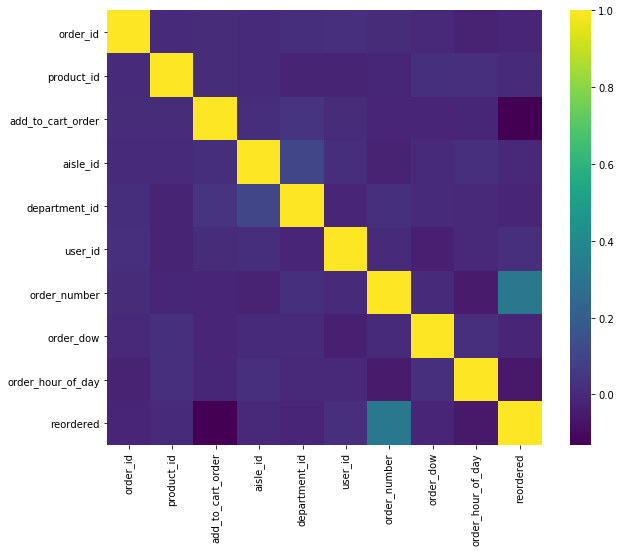

In [175]:
f,ax=plt.subplots(figsize=(10,8))
corr_data=df.corr()
sns.heatmap(corr_data, mask=np.zeros_like(corr_data, dtype=np.bool), cmap='viridis',
square=True, ax=ax)
plt.show()

In [184]:
array = df.values
X1 = array[:,0:10]
Y1 = array[:,10:11]

In [185]:
X1

array([[406039, 24954, 1, ..., 6, 9, 9.0],
       [1689173, 49521, 7, ..., 6, 9, 6.0],
       [2224589, 16283, 9, ..., 4, 10, 8.0],
       ...,
       [3149, 25209, 2, ..., 1, 15, '0'],
       [2597945, 38689, 10, ..., 5, 12, 5.0],
       [232672, 45066, 28, ..., 0, 8, 3.0]], dtype=object)

In [186]:
Y1

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=object)

In [250]:
#feature selection, changing num_feature to decide the features you will use to build model.
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
NUM_FEATURES = 5
model = LinearRegression()
rfe = RFE(model, NUM_FEATURES)
fit = rfe.fit(X1, Y1)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)
print(sorted(zip(map (lambda x: round(x,4),fit.ranking_),list(df.columns.values))))

Num Features: 5
Selected Features: [False False  True False False False  True  True  True  True]
Feature Ranking: [6 4 1 3 2 5 1 1 1 1]
[(1, 'add_to_cart_order'), (1, 'days_since_prior_order'), (1, 'order_dow'), (1, 'order_hour_of_day'), (1, 'order_number'), (2, 'department_id'), (3, 'aisle_id'), (4, 'product_id'), (5, 'user_id'), (6, 'order_id')]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [251]:
score = rfe.score(X1, Y1)
print("Model Score with selected features is:", score)

Model Score with selected features is: 0.12618029674360698


In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


skb = SelectKBest(f_classif,k='all').fit(df,subsetdata['reordered'])
scores = skb.scores_
all_features = df.columns.values
sort_index = np.argsort(scores)[::-1]
rank = 1
ranked_features = []
print ("Ranking of features is ")
for x in sort_index:
    print (rank,". Score  ",all_features[x]," is ",scores[x])
    ranked_features.append(all_features[x])
    rank += 1
print (all_features)

Ranking of features is 
1 . Score   order_number  is  569.5038002711212
2 . Score   add_to_cart_order  is  88.72887191132432
3 . Score   order_hour_of_day  is  16.501063103934953
4 . Score   user_id  is  2.104847970313727
5 . Score   order_dow  is  1.2615704383096802
6 . Score   order_id  is  1.0580328401207415
7 . Score   days_since_prior_order  is  0.9290843446853068
8 . Score   department_id  is  0.8292373948244601
9 . Score   aisle_id  is  0.07776832905367613
10 . Score   product_id  is  0.005947000083305333
['order_id' 'product_id' 'add_to_cart_order' 'aisle_id' 'department_id'
 'user_id' 'order_number' 'order_dow' 'order_hour_of_day'
 'days_since_prior_order']


In [252]:
df1 = subsetdata.drop(columns=['order_id','user_id','product_id','department_id','product_name','aisle_id','aisle','department','eval_set'], axis=1)
df1.head()

,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order
3846192,1,1,15,6,9,9
16009955,7,1,23,6,9,6
21090475,9,1,6,4,10,8
28697339,1,1,13,4,21,6
28043420,21,1,22,5,16,4


In [104]:
df1.describe()

,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8.454400,0.587200,17.462600,2.67120,13.430800
std,7.239835,0.492387,18.166282,2.07286,4.283933
min,1.000000,0.000000,1.000000,0.00000,0.000000
25%,3.000000,0.000000,5.000000,1.00000,10.000000
50%,6.000000,1.000000,11.000000,2.00000,13.000000
75%,12.000000,1.000000,24.000000,5.00000,16.000000
max,56.000000,1.000000,99.000000,6.00000,23.000000


In [253]:
X = df1.drop('reordered', axis=1)
y = df1['reordered']

In [269]:
# prepare models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
models = []
models.append(('Kernel SVC',SVC(class_weight='balanced',kernel='rbf')))
models.append(('Decision Tree',DecisionTreeClassifier(class_weight='balanced',min_samples_split=5)))
models.append(('Logistic Regression',LogisticRegression(random_state = 0,max_iter=500,class_weight='balanced')))
models.append(('BOOSR',AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=200,algorithm="SAMME.R", learning_rate=0.05, random_state=42)))
models.append(('RF2', RandomForestClassifier(n_estimators=500,max_depth=2, random_state=0)))
models.append(('SVM linear', LinearSVC(random_state=0,class_weight='balanced')))
models.append(('KNN',KNeighborsClassifier()))

In [270]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Kernel SVC: 0.671600 (0.018326)
Decision Tree: 0.619400 (0.020377)
Logistic Regression: 0.656600 (0.021634)
BOOSR: 0.633200 (0.024983)
RF2: 0.709600 (0.015200)
SVM linear: 0.640800 (0.066748)
KNN: 0.682600 (0.020240)


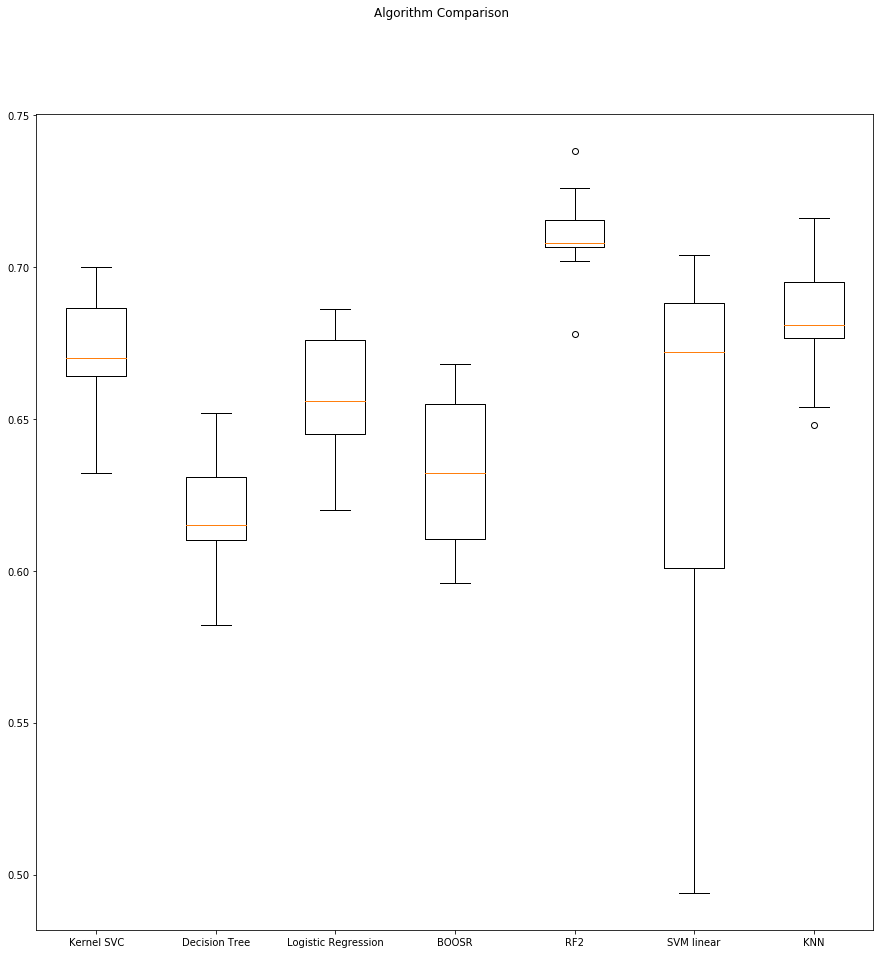

In [256]:
from matplotlib import pyplot
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [335]:
# prepare models
models_rf = []

In [336]:
models_rf.append(('RF4', RandomForestClassifier(n_estimators=500,max_depth=4, random_state=0)))
models_rf.append(('RF5', RandomForestClassifier(n_estimators=500,max_depth=5, random_state=0)))
models_rf.append(('RF6', RandomForestClassifier(n_estimators=500,max_depth=6, random_state=0)))
models_rf.append(('RF7', RandomForestClassifier(n_estimators=500,max_depth=7, random_state=0)))
models_rf.append(('RF8', RandomForestClassifier(n_estimators=500,max_depth=8, random_state=0)))
models_rf.append(('RF15', RandomForestClassifier(n_estimators=500,max_depth=15, random_state=0)))
models_rf.append(('RF20', RandomForestClassifier(n_estimators=500,max_depth=20, random_state=0)))
models_rf.append(('RF25', RandomForestClassifier(n_estimators=500,max_depth=25, random_state=0)))
models_rf.append(('RF30', RandomForestClassifier(n_estimators=500,max_depth=30, random_state=0)))
models_rf.append(('RF35', RandomForestClassifier(n_estimators=500,max_depth=35, random_state=0)))

In [337]:
results_rf = []
names_rf = []
scoring = 'accuracy'
for name, model in models_rf:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results_rf10 = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results_rf.append(cv_results_rf10)
    names_rf.append(name)
    msg = "%s: %f (%f)" % (name, cv_results_rf10.mean(), cv_results_rf10.std())
    print(msg)

RF4: 0.715600 (0.016752)
RF5: 0.717400 (0.016421)
RF6: 0.717200 (0.016497)
RF7: 0.718400 (0.016169)
RF8: 0.714200 (0.020966)
RF15: 0.699600 (0.024030)
RF20: 0.697200 (0.022328)
RF25: 0.698200 (0.024256)
RF30: 0.698600 (0.024836)
RF35: 0.698200 (0.024794)


In [260]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

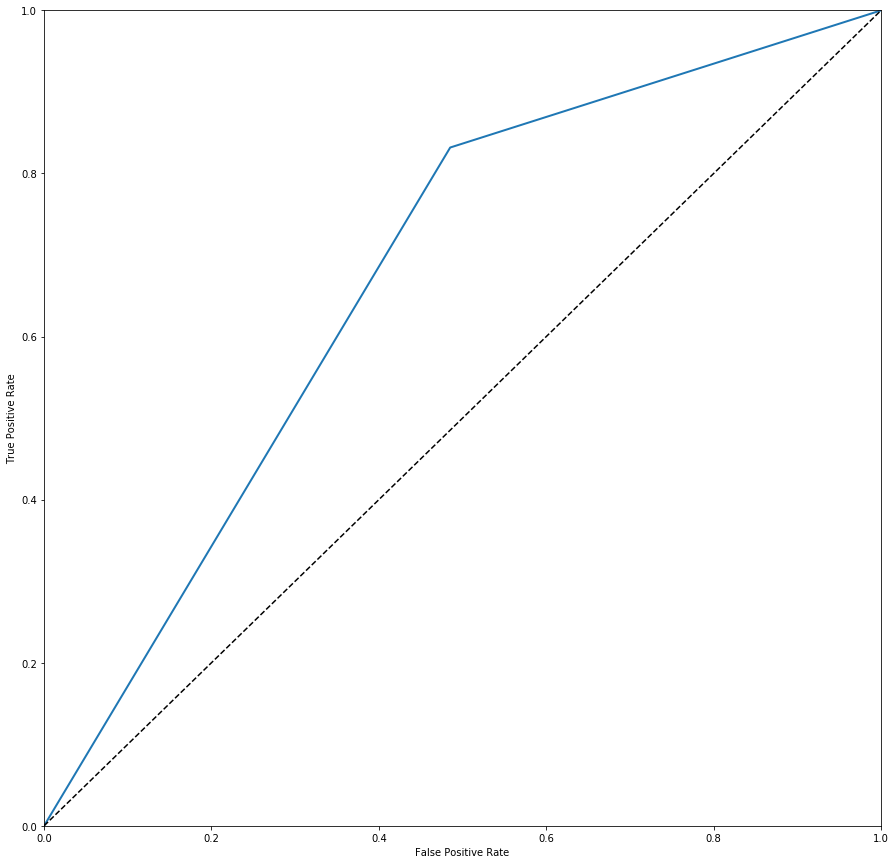

In [404]:
#Ramdon Forest depth=8
insta_rf6=RandomForestClassifier(n_estimators=120,max_depth=15, random_state=0)
insta_rf6.fit(X_train, y_train)
y_scores_rf6_cv5 = cross_val_predict(insta_rf6, X_train, y_train, cv=6)
fpr_rf6_cv5, tpr_rf6_cv5, thresholds_rf6_cv5 = roc_curve(y_train, y_scores_rf6_cv5)
def plot_roc_curve(fpr_rf6_cv5, tpr_rf6_cv5, label=None):
    plt.plot(fpr_rf6_cv5, tpr_rf6_cv5, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_rf6_cv5, tpr_rf6_cv5)
plt.show()

In [405]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores_rf6_cv5)

0.6733126396866228

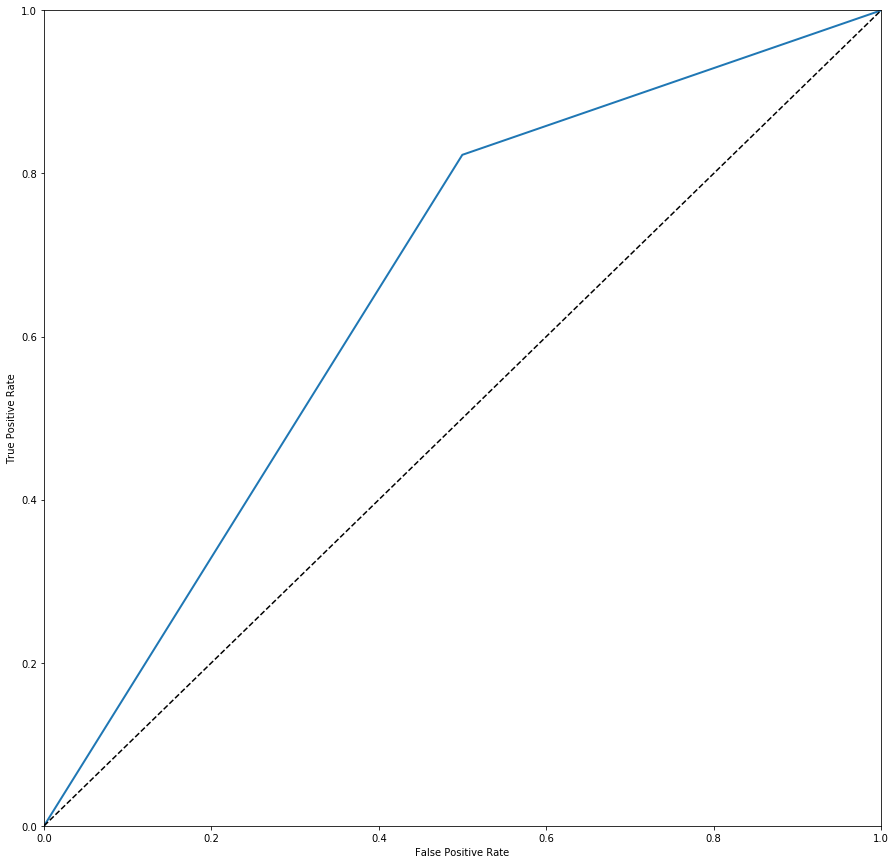

In [406]:
#Ramdon Forest depth=6
y_scores_rf6_cv10 = cross_val_predict(insta_rf6, X_train, y_train, cv=10)
fpr_rf6_cv10, tpr_rf6_cv10, thresholds_rf6_cv10 = roc_curve(y_train, y_scores_rf6_cv10)
def plot_roc_curve(fpr_rf6_cv10, tpr_rf6_cv10, label=None):
    plt.plot(fpr_rf6_cv10, tpr_rf6_cv10, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_rf6_cv10, tpr_rf6_cv10)
plt.show()

In [407]:
roc_auc_score(y_train, y_scores_rf6_cv10)

0.6615892020067222

In [127]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [399]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=500,max_depth=6, random_state=0)
rnd_clf.fit(X_train, y_train)


y_prob_rf = rnd_clf.predict_proba(X_test)

y_pred_rf = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))

0.703


In [356]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred_rf))

0.7028112449799196


In [357]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred_rf))

0.8779264214046822


In [400]:
scores_precision = cross_val_score(rnd_clf, X_train, y_train, cv = 10, scoring='precision')
scores_precision

array([0.70890411, 0.6977492 , 0.71428571, 0.69415808, 0.69387755,
       0.70921986, 0.73239437, 0.71523179, 0.71272727, 0.70261438])

In [397]:
#depth=35 precision 
(0.69642857+ 0.69642857+ 0.69811321+ 0.70411985+ 0.69485294+
       0.7164751 + 0.72426471+0.7173913 + 0.70472441+ 0.68896321)/10

0.7041761870000001

In [392]:
#depth=30 precision 
(0.69642857+ 0.69642857+ 0.69811321+ 0.70411985+ 0.69485294+
       0.7164751 + 0.72426471+ 0.7173913 + 0.70472441+ 0.69 )/10

0.704279866

In [386]:
#depth=25 precision
(0.69395018+ 0.69503546+ 0.69548872+ 0.69888476+ 0.69372694+
       0.71755725+ 0.72426471+ 0.7189781 + 0.7007874 + 0.69360269)/10

0.703227621

In [381]:
#depth=20 precision 
(0.69892473+ 0.69473684+ 0.69662921+ 0.69924812+ 0.69485294+
       0.72137405+ 0.72794118+ 0.72058824+ 0.69960474+ 0.69435216)/10

0.704825221

In [376]:
#depth=15 precision 
(0.69503546+ 0.69257951+ 0.70075758+ 0.69402985+ 0.69708029+
       0.72014925+ 0.72627737+ 0.70714286+ 0.70114943+ 0.69)/10

0.70242016

In [371]:
#depth=8 precision
(0.70422535+0.69636964+ 0.71428571+ 0.69858156+ 0.68965517+
       0.70567376+ 0.72887324+ 0.71959459+ 0.71161049+ 0.70394737)/10

0.7072816879999999

In [366]:
#depth=7 precision 
(0.70934256 + 0.6970684 + 0.70909091+ 0.69444444+ 0.69204152+
       0.70070423+ 0.73591549+ 0.71666667+ 0.7110266+ 0.70163934)/10

0.7067940160000001

In [402]:
#depth=6 precision
(0.70890411+ 0.6977492 +  0.71428571+  0.69415808+  0.69387755+ 
       0.70921986+  0.73239437+ 0.71523179+  0.71272727+  0.70261438)/10

0.708116232

In [401]:
scores_recall= cross_val_score(rnd_clf, X_train, y_train, cv = 10, scoring='recall')
scores_recall

array([0.88085106, 0.92340426, 0.85106383, 0.86324786, 0.87179487,
       0.85470085, 0.88888889, 0.92307692, 0.83760684, 0.91880342])

In [398]:
#depth=35 recall
(0.82978723+ 0.82978723+0.78723404+ 0.8034188 + 0.80769231+
       0.7991453 + 0.84188034+ 0.84615385 +0.76495726+ 0.88034188)/10

0.8190398240000001

In [393]:
#depth=30 recall
(0.82978723+ 0.82978723+ 0.78723404+ 0.8034188 + 0.80769231+
       0.7991453 + 0.84188034+0.84615385+ 0.76495726+ 0.88461538)/10

0.819467174

In [388]:
#depth=25 recall
(0.82978723+ 0.83404255+ 0.78723404+0.8034188 + 0.8034188 +
       0.8034188 + 0.84188034+ 0.84188034+ 0.76068376+ 0.88034188)/10

0.8186106540000001

In [382]:
#depth=20 recall
(0.82978723+ 0.84255319+ 0.79148936+ 0.79487179+ 0.80769231+
       0.80769231+ 0.84615385+ 0.83760684+ 0.75641026+ 0.89316239)/10

0.8207419530000001

In [377]:
#depth=15 recall
(0.83404255+ 0.78723404+ 0.79487179+ 0.81623932+
       0.82478632+ 0.85042735+ 0.84615385+ 0.78205128+ 0.88461538)/10

0.7420421880000001

In [372]:
#depth=8 recall
(0.85106383+ 0.89787234+ 0.82978723+ 0.84188034+ 0.85470085+
       0.85042735+ 0.88461538+ 0.91025641+ 0.81196581+ 0.91452991)/10

0.8647099449999999

In [367]:
#depth=7 recall
(0.87234043+ 0.9106383 + 0.82978723+ 0.85470085+ 0.85470085+
       0.85042735+ 0.89316239+0.91880342+ 0.7991453 + 0.91452991)/10

0.8698236030000001

In [403]:
#depth=6 recall
(0.88085106+ 0.92340426+ 0.85106383+ 0.86324786+ 0.87179487+
       0.85470085+ 0.88888889+ 0.92307692+ 0.83760684+ 0.91880342)/10

0.8813438800000002

No handles with labels found to put in legend.
/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


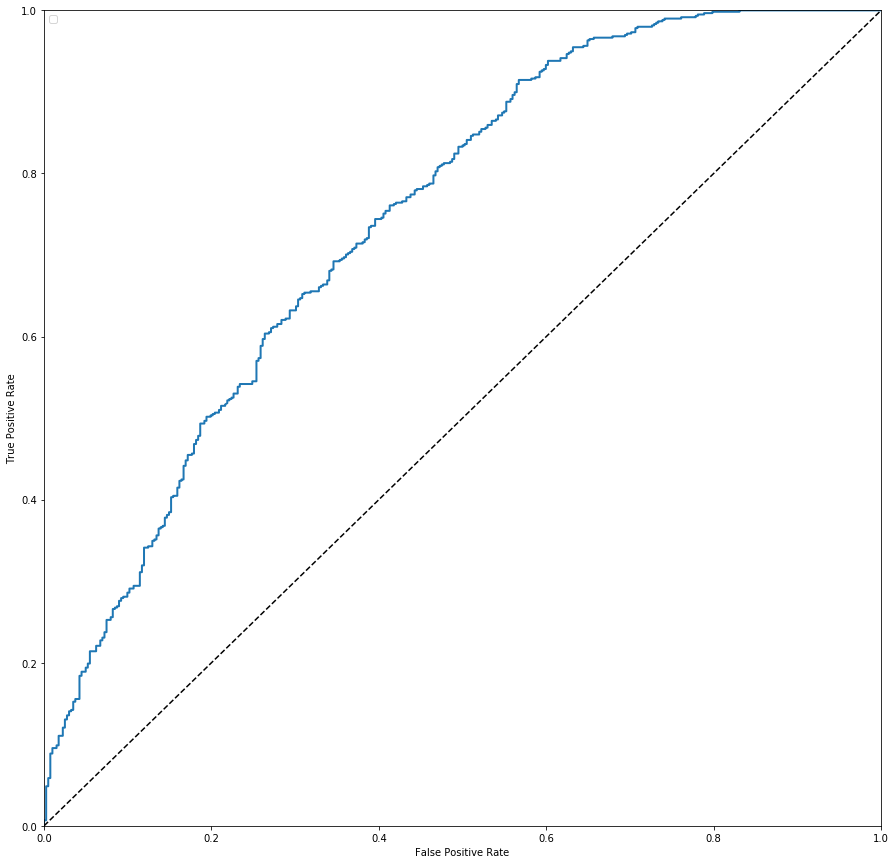

In [268]:
y_score_rf = y_prob_rf[:,1]
fpr_rf,tpr_rf, threshold_rf = roc_curve(y_test, y_score_rf)
# ROC curve plotting
def plot_roc_curve(fpr, tpr, lable=None):
    plt.plot(fpr,tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr_rf,tpr_rf)
plt.legend(loc="bottom right")
plt.show()

<Figure size 1080x1080 with 0 Axes>

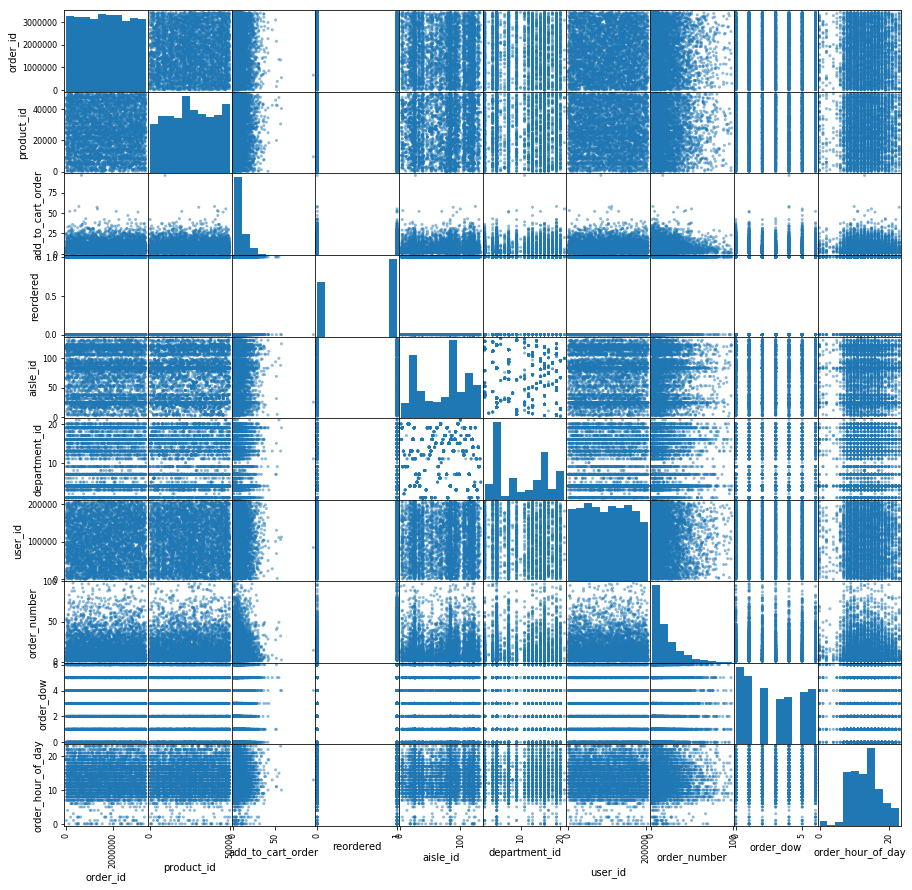

In [139]:
#In scatter plot, we can see there are some feature are correlated with each other. 
from pandas.plotting import scatter_matrix
rcParams['figure.figsize'] = 15, 15
plt.figure()
scatter_matrix(df)
plt.show()